# 라이브러리 로드

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline
import koreanize_matplotlib
%config InlineBackend.figure_format = 'retina'
from tqdm import tqdm

In [2]:
# 시각화 테마
rc = {
    "axes.facecolor": "#FFF9ED",
    "figure.facecolor": "#FFF9ED",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "NanumSquareRound", #"serif"
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}

sns.set(rc=rc)

# 데이터 로드

In [3]:
df = pd.read_csv('sqd_data/최종결제데이터.csv', encoding='cp949').drop(columns='Unnamed: 0')
df.shape

(16858, 16)

In [4]:
df.head()

,휴일,일자,요일,시간,영수증번호,상품코드,품목,상품명,수량,가격,결제액,거래수단,카드번호,카드사,고객ID,강수량
0,신정,2022-01-01,토,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2022-01-02,일,11:45:31,1.0,10.0,커피,ice 카페라떼,1.0,4000.0,4000.0,신용,5137-92**-****-5821,롯데,8.579258e+10,NaN
2,NaN,2022-01-02,일,11:45:49,2.0,25.0,커피,코클슈페너,1.0,4500.0,4500.0,체크,9530-03**-****-6807,비씨,8.600368e+10,NaN
3,NaN,2022-01-02,일,13:54:42,3.0,2.0,에스프레소,스트라파짜토,2.0,4000.0,4000.0,체크,5365-10**-****-1328,국민,3.151013e+10,NaN
4,NaN,2022-01-02,일,13:55:49,4.0,28.0,커피,ice 바닐라라떼,1.0,4500.0,12000.0,신용,4890-16**-****-2001,현대,2.016200e+09,NaN


In [5]:
df.tail()

,휴일,일자,요일,시간,영수증번호,상품코드,품목,상품명,수량,가격,결제액,거래수단,카드번호,카드사,고객ID,강수량
16853,NaN,2023-05-31,수,19:53:02,16.0,8.0,커피,ice 아메리카노,1.0,3500.0,3500.0,체크,5365-10**-****-3324,국민,3.351033e+10,1.3
16854,NaN,2023-05-31,수,20:23:01,17.0,8.0,커피,ice 아메리카노,3.0,10500.0,10500.0,신용,5585-26**-****-1818,국민,8.152618e+10,1.3
16855,NaN,2023-05-31,수,20:36:12,18.0,28.0,커피,ice 바닐라라떼,1.0,4500.0,8500.0,현금,NaN,NaN,2.305312e+07,1.3
16856,NaN,2023-05-31,수,20:36:12,18.0,35.0,논커피,ice 얼그레이,1.0,4000.0,8500.0,현금,NaN,NaN,2.305312e+07,1.3
16857,NaN,2023-05-31,수,20:45:54,19.0,8.0,커피,ice 아메리카노,2.0,7000.0,7000.0,신용,5239-30**-****-6604,현대,6.693066e+10,1.3


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16858 entries, 0 to 16857
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   휴일      657 non-null    object 
 1   일자      16858 non-null  object 
 2   요일      16858 non-null  object 
 3   시간      16799 non-null  object 
 4   영수증번호   16799 non-null  float64
 5   상품코드    16799 non-null  float64
 6   품목      16532 non-null  object 
 7   상품명     16799 non-null  object 
 8   수량      16799 non-null  float64
 9   가격      16799 non-null  float64
 10  결제액     16799 non-null  float64
 11  거래수단    16799 non-null  object 
 12  카드번호    14152 non-null  object 
 13  카드사     14152 non-null  object 
 14  고객ID    16799 non-null  float64
 15  강수량     5889 non-null   float64
dtypes: float64(7), object(9)
memory usage: 2.1+ MB


# 전처리

In [7]:
# '일자'를 날짜형식으로 변환
df['일자'] = pd.to_datetime(df['일자'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16858 entries, 0 to 16857
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   휴일      657 non-null    object        
 1   일자      16858 non-null  datetime64[ns]
 2   요일      16858 non-null  object        
 3   시간      16799 non-null  object        
 4   영수증번호   16799 non-null  float64       
 5   상품코드    16799 non-null  float64       
 6   품목      16532 non-null  object        
 7   상품명     16799 non-null  object        
 8   수량      16799 non-null  float64       
 9   가격      16799 non-null  float64       
 10  결제액     16799 non-null  float64       
 11  거래수단    16799 non-null  object        
 12  카드번호    14152 non-null  object        
 13  카드사     14152 non-null  object        
 14  고객ID    16799 non-null  float64       
 15  강수량     5889 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(8)
memory usage: 2.1+ MB


In [8]:
# 방문 시간대 컬럼 만들기
df['방문시간대'] = df['시간'].str[:2]
df.head(3)

,휴일,일자,요일,시간,영수증번호,상품코드,품목,상품명,수량,가격,결제액,거래수단,카드번호,카드사,고객ID,강수량,방문시간대
0,신정,2022-01-01,토,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2022-01-02,일,11:45:31,1.0,10.0,커피,ice 카페라떼,1.0,4000.0,4000.0,신용,5137-92**-****-5821,롯데,8.579258e+10,NaN,11
2,NaN,2022-01-02,일,11:45:49,2.0,25.0,커피,코클슈페너,1.0,4500.0,4500.0,체크,9530-03**-****-6807,비씨,8.600368e+10,NaN,11


# RFM
: 가치있는 고객을 추출해내어 이를 기준으로 고객을 분류할 수 있는 매우 간단하면서도 유용하게 사용될 수 있는 방법


* Recency - 거래의 최근성: 고객이 얼마나 최근에 구입했는가? `일자`
* Frequency - 거래빈도: 고객이 얼마나 빈번하게 우리 상품을 구입했나? `영수증번호`
* Monetary - 거래규모: 고객이 구입했던 총 금액은 어느 정도인가? `결제액`

## Recency, Frequency, Monetary 컬럼 생성

In [9]:
# Recency 계산을 위해 해당 주문에서 가장 최근 구매가 일어난 시간을 가져옵니다.
# 최근 거래 기준일(last_timestamp)을 만들기 위해 timedelta로 날짜를 더해줍니다.(최소값:1 설정) 

last_timestamp = df['일자'].max() + dt.timedelta(days=1) # 230531 기준
df['일자'].max(), last_timestamp

(Timestamp('2023-05-31 00:00:00'), Timestamp('2023-06-01 00:00:00'))

In [76]:
# RFM 데이터프레임만들기
# Recency : 최근 거래 기준일(last_timestamp)과 고객별 최근 구매한 날짜(x.max())와 차이값
# Frequency : 구매 빈도수
# Monetary : 총 구매 금액
rfm = df.groupby("고객ID").agg({"일자": [lambda x : (last_timestamp - x.max()).days, "nunique"], # '재주문'이 아닌 '재방문' 기준
                                    "가격":"sum"})
rfm.columns = ["Recency", "Frequency", "Monetary"]
rfm

,Recency,Frequency,Monetary
고객ID,,,
1.910000e+02,48,1,8000.0
3.001200e+06,118,3,8500.0
3.004800e+06,418,1,3500.0
3.600059e+06,83,3,43600.0
3.800026e+06,173,1,10500.0
...,...,...,...
9.988000e+10,179,1,17000.0
9.991300e+10,500,1,9500.0
9.991500e+10,488,1,11000.0


## 기본 RFM

### RFM 모형

In [77]:
# RFM에 부여할 숫자 등급 범위 만들기
r_labels = list(range(5, 0, -1))
m_labels = list(range(1, 6))
cut_size = 5

In [78]:
r_labels

[5, 4, 3, 2, 1]

In [79]:
m_labels

[1, 2, 3, 4, 5]

In [80]:
# Frequency의 경우 데이터의 분포가 치우쳐 있음
rfm['Frequency'].describe()

count    6683.000000
mean        1.394583
std         2.846215
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        89.000000
Name: Frequency, dtype: float64

In [81]:
# Frequency의 88%가 1임.
rfm['Frequency'].value_counts(1).nlargest(3)

Frequency
1    0.887027
2    0.065839
3    0.019752
Name: proportion, dtype: float64

<Axes: xlabel='Frequency'>

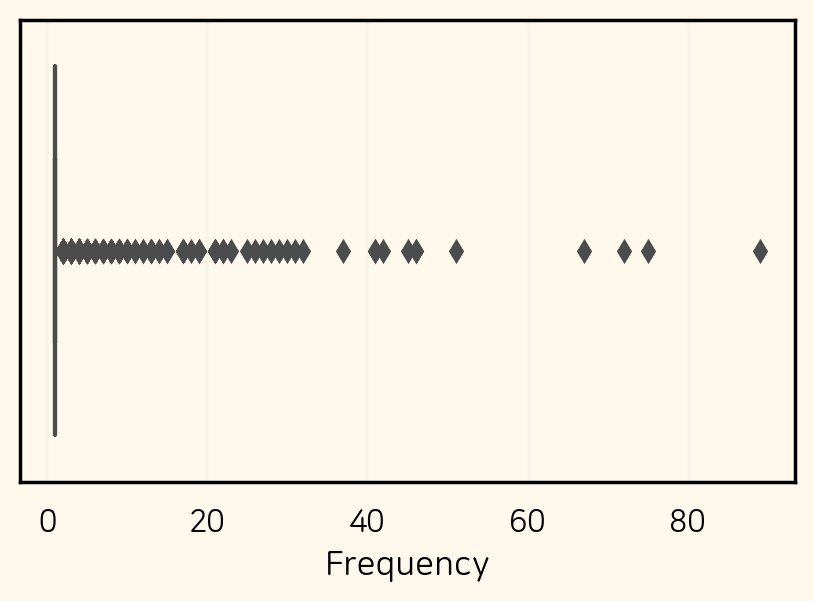

In [82]:
# Frequency boxplot
plt.figure(figsize=(5,3))
sns.boxplot(data=rfm, x='Frequency')

=> Frequency의 구간화는 별도로 진행

In [83]:
# RFM 구간화 중 R, M 먼저 진행 (1~5)
r_cut = pd.qcut(rfm["Recency"], cut_size, r_labels)
m_cut = pd.qcut(rfm["Monetary"], cut_size, m_labels)

In [84]:
# R, M 컬럼 한꺼번에 만들기
rfm = rfm.assign(R=r_cut, M=m_cut)
rfm

,Recency,Frequency,Monetary,R,M
고객ID,,,,,
1.910000e+02,48,1,8000.0,5,3
3.001200e+06,118,3,8500.0,4,3
3.004800e+06,418,1,3500.0,1,1
3.600059e+06,83,3,43600.0,4,5
3.800026e+06,173,1,10500.0,3,4
...,...,...,...,...,...
9.988000e+10,179,1,17000.0,3,5
9.991300e+10,500,1,9500.0,1,3
9.991500e+10,488,1,11000.0,1,4


In [85]:
# F 컬럼 만들기
# Frequency가 1인 경우 1, 2인 경우 2, 3인 경우 3, 나머지인 경우 4~5로 분류
# Frequency가 1, 2, 3의 구성비율이 유의미하게 크다고 생각하여 별도로 그룹을 부여함.

rfm['F'] = 0 # 기본값을 0으로 지정
rfm.loc[rfm['Frequency'] == 1, 'F'] = 1
rfm.loc[rfm['Frequency'] == 2, 'F'] = 2
rfm.loc[rfm['Frequency'] == 3, 'F'] = 3
rfm

,Recency,Frequency,Monetary,R,M,F
고객ID,,,,,,
1.910000e+02,48,1,8000.0,5,3,1
3.001200e+06,118,3,8500.0,4,3,3
3.004800e+06,418,1,3500.0,1,1,1
3.600059e+06,83,3,43600.0,4,5,3
3.800026e+06,173,1,10500.0,3,4,1
...,...,...,...,...,...,...
9.988000e+10,179,1,17000.0,3,5,1
9.991300e+10,500,1,9500.0,1,3,1
9.991500e+10,488,1,11000.0,1,4,1


<Axes: xlabel='Frequency'>

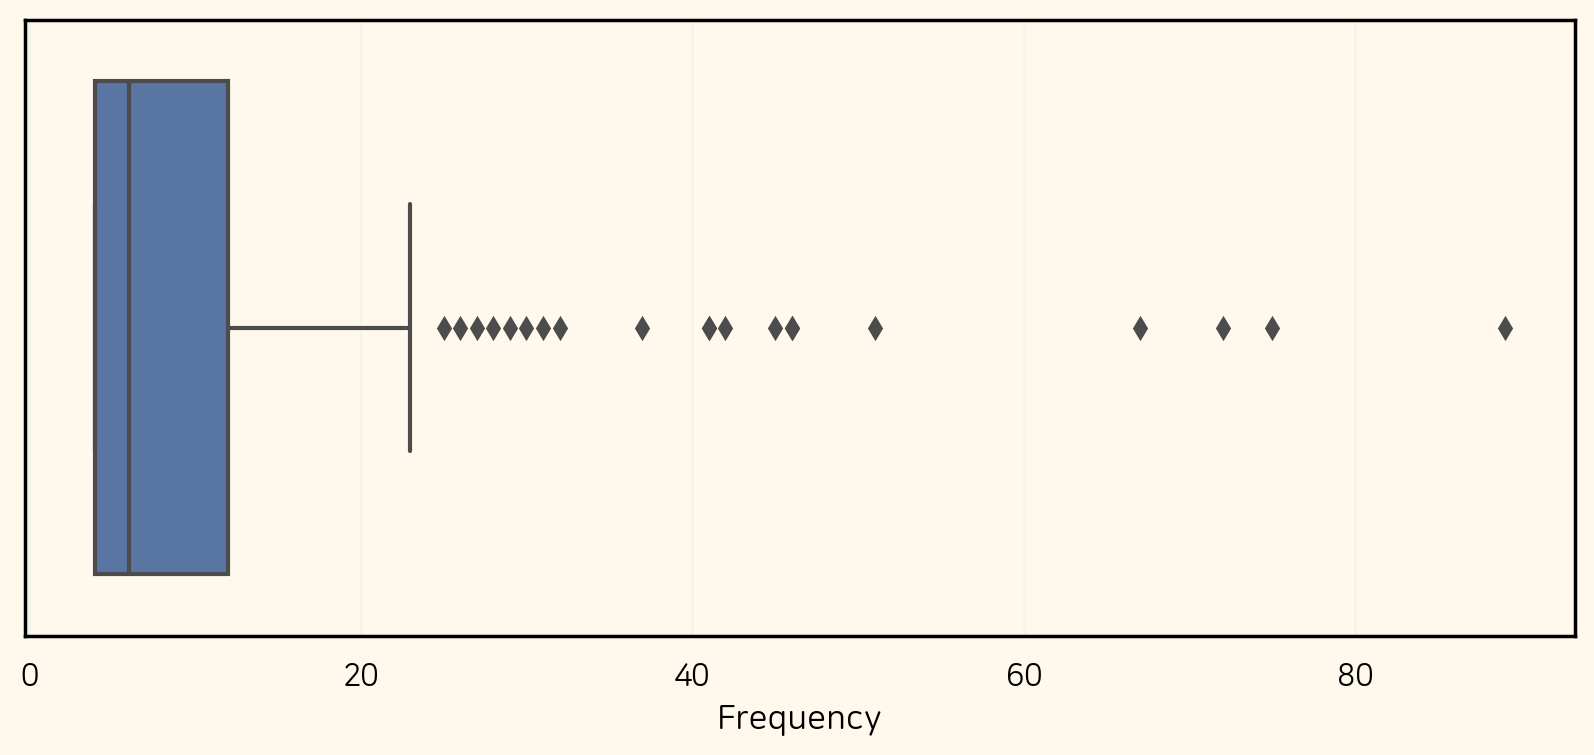

In [87]:
# 'F'가 1,2,3이 아닌 경우 Frequency의 분포
plt.figure(figsize=(10,4))
sns.boxplot(data=rfm.loc[rfm['F']==0], x='Frequency')

<Axes: xlabel='Frequency', ylabel='Count'>

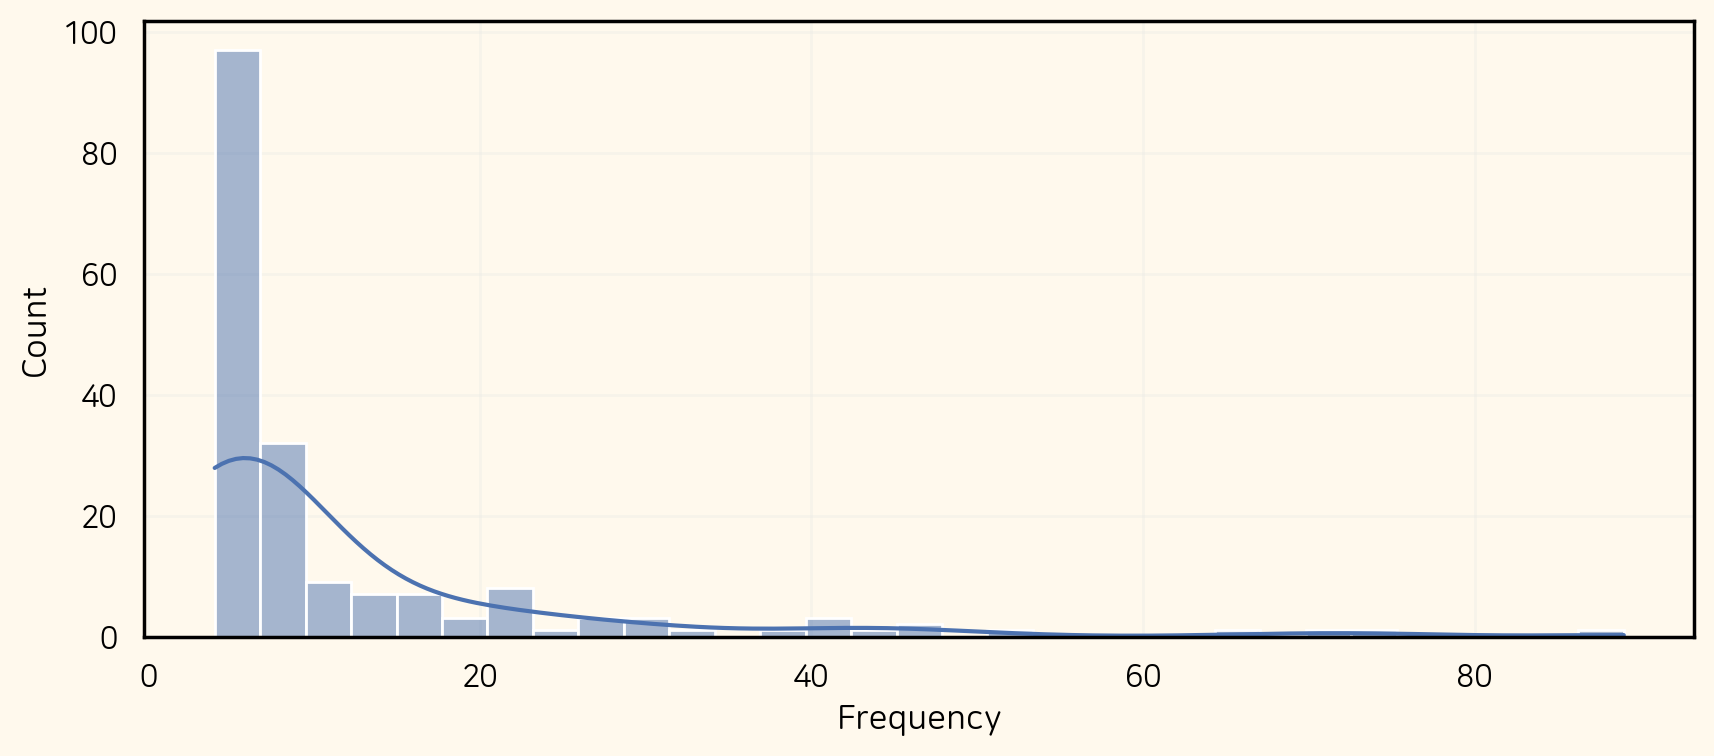

In [88]:
plt.figure(figsize=(10,4))
sns.histplot(data=rfm.loc[rfm['F']==0], x='Frequency', kde=True)

In [89]:
display(rfm.loc[rfm['F']==0, 'Frequency'].mean())
display(rfm.loc[rfm['F']==0, 'Frequency'].median())

11.562841530054644

6.0

In [90]:
# 'F'컬럼이 1,2,3이 아닌 경우, 나머지 값들의 중앙값 이하는 4, 이상은 5를 부여. 즉, 4와 5를 50:50으로 나눔
rfm.loc[rfm['F'] == 0, 'F'] = rfm.loc[rfm['F'] == 0, 'Frequency'].apply(lambda x: 4 if x < rfm.loc[rfm['F'] == 0, 'Frequency'].median() else 5)

In [96]:
rfm['F'].value_counts()

F
1    5928
2     440
3     132
5     104
4      79
Name: count, dtype: int64

In [97]:
# 'F'컬럼 형변환 : int -> category
rfm['F'] = rfm['F'].astype('category')
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6683 entries, 191.0 to 99966991169.0
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Recency    6683 non-null   int64   
 1   Frequency  6683 non-null   int64   
 2   Monetary   6683 non-null   float64 
 3   R          6683 non-null   category
 4   M          6683 non-null   category
 5   F          6683 non-null   category
dtypes: category(3), float64(1), int64(2)
memory usage: 229.0 KB


In [98]:
rfm['F'].value_counts(1)

F
1    0.887027
2    0.065839
3    0.019752
5    0.015562
4    0.011821
Name: proportion, dtype: float64

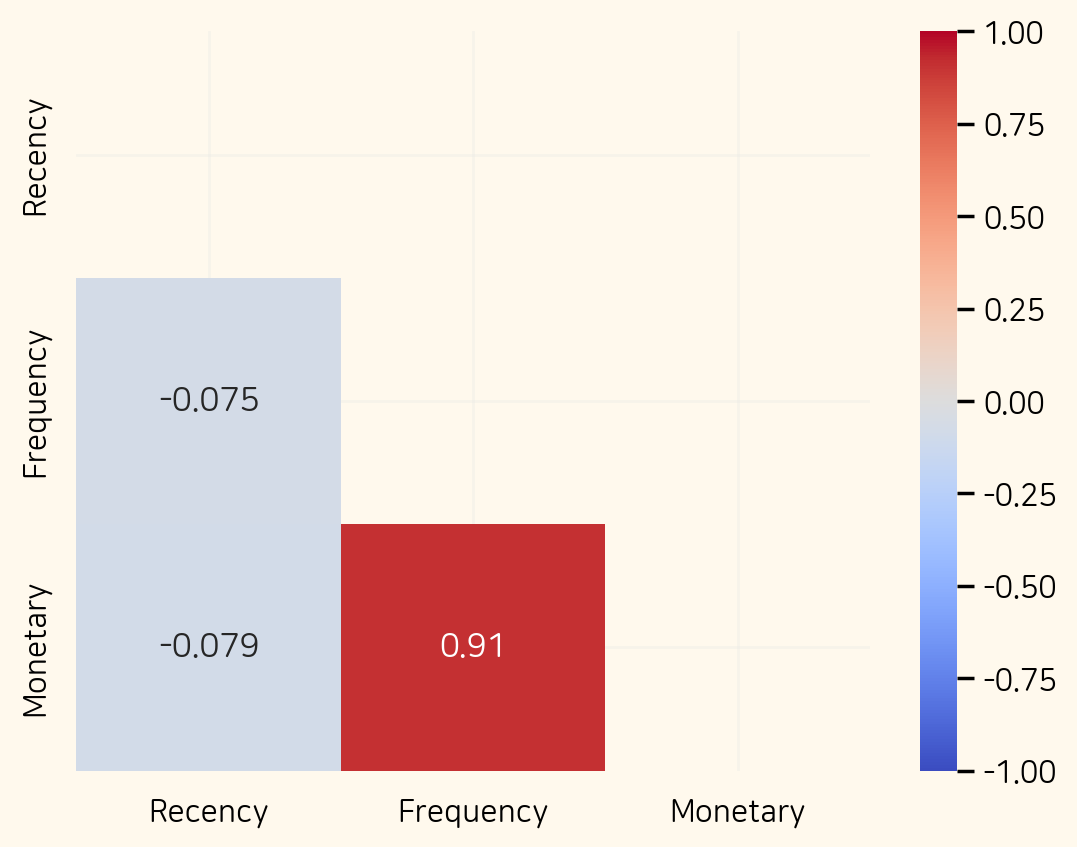

In [103]:
# RFM 상관관계 확인
rfm_corr = rfm.corr(numeric_only=True)
mask = np.triu(np.ones_like(rfm_corr))
sns.heatmap(rfm_corr, cmap="coolwarm", annot=True, vmin=-1, vmax=1, mask=mask);

### RFM code

In [104]:
# R, F, M 값을 문자 그대로 붙여서 세그먼트를 구분
rfm["RFM_code"] = rfm["R"].astype(str) + rfm["F"].astype(str) + rfm["M"].astype(str)
rfm.head(1)

,Recency,Frequency,Monetary,R,M,F,RFM_code
고객ID,,,,,,,
191.0,48,1,8000.0,5,3,1,513


### RFM Score

In [106]:
# R, F, M 값을 더해 세그먼트 점수 구하기
rfm["RFM_score"] = rfm[["R", "F", "M"]].sum(axis=1)
rfm.head(1)

,Recency,Frequency,Monetary,R,M,F,RFM_code,RFM_score
고객ID,,,,,,,,
191.0,48,1,8000.0,5,3,1,513,9


### Class 분류

In [120]:
# qcut 을 통해 3단계로 고객군 나누기 - bronze, silver, gold
labels = ["bronze", "silver", "gold"]
rfm['RFM_class'] = pd.qcut(rfm['RFM_score'], 3, labels)
rfm.head()

,Recency,Frequency,Monetary,R,M,F,RFM_code,RFM_score,RFM_class
고객ID,,,,,,,,,
191.0,48,1,8000.0,5,3,1,513,9,gold
3001200.0,118,3,8500.0,4,3,3,433,10,gold
3004800.0,418,1,3500.0,1,1,1,111,3,bronze
3600059.0,83,3,43600.0,4,5,3,435,12,gold
3800026.0,173,1,10500.0,3,4,1,314,8,silver


In [121]:
rfm.groupby("RFM_class")["RFM_score"].describe()

,count,mean,std,min,25%,50%,75%,max
RFM_class,,,,,,,,
bronze,2787.0,4.939003,1.014190,3.0,4.0,5.0,6.0,6.0
silver,2145.0,7.444289,0.497002,7.0,7.0,7.0,8.0,8.0
gold,1751.0,10.225014,1.463722,9.0,9.0,10.0,11.0,15.0


## R, F, M의 가중치를 고려한 RFM
참고 : https://zephyrus1111.tistory.com/16

In [107]:
## 필요 변수 추출
rfm_score = rfm[['Monetary', 'R','F','M']].reset_index()
rfm_score

,고객ID,Monetary,R,F,M
0,1.910000e+02,8000.0,5,1,3
1,3.001200e+06,8500.0,4,3,3
2,3.004800e+06,3500.0,1,1,1
3,3.600059e+06,43600.0,4,3,5
4,3.800026e+06,10500.0,3,1,4
...,...,...,...,...,...
6678,9.988000e+10,17000.0,3,1,5
6679,9.991300e+10,9500.0,1,1,3
6680,9.991500e+10,11000.0,1,1,4
6681,9.991600e+10,3500.0,1,1,1


In [108]:
rfm_score = rfm_score.rename(columns={'고객ID':'CustomerID', 'MonetaryValue':'Monetary', 'R':'Recency_R', 'F':'Frequency_F', 'M':'Monetary_M'})
rfm_score

,CustomerID,Monetary,Recency_R,Frequency_F,Monetary_M
0,1.910000e+02,8000.0,5,1,3
1,3.001200e+06,8500.0,4,3,3
2,3.004800e+06,3500.0,1,1,1
3,3.600059e+06,43600.0,4,3,5
4,3.800026e+06,10500.0,3,1,4
...,...,...,...,...,...
6678,9.988000e+10,17000.0,3,1,5
6679,9.991300e+10,9500.0,1,1,3
6680,9.991500e+10,11000.0,1,1,4
6681,9.991600e+10,3500.0,1,1,1


In [109]:
# 사전 준비 코드

def get_score(level, data, reverse = False):
    '''
    Description :
    level안에 있는 원소를 기준으로
    1 ~ len(level)+ 1 까지 점수를 부여하는 함수
    
    Parameters :
    level = 튜플 또는 리스트 타입의 숫자형 데이터이며 반드시 오름차순으로 정렬되어 있어야함.
    예 - [1,2,3,4,5] O, [5,4,3,2,1] X, [1,3,2,10,4] X 
    data = 점수를 부여할 데이터. 순회가능한(iterable) 데이터 형식
    reverse = 점수가 높을 때 그에 해당하는 값을 낮게 설정하고 싶을 때 True
    return :
    점수를 담고 있는 리스트 반환
    '''
    score = [] 
    for j in range(len(data)): 
        for i in range(len(level)): 
            if data[j] <= level[i]: 
                score.append(i+1) 
                break 
            elif data[j] > max(level): 
                score.append(len(level)+1) 
                break 
            else: 
                continue
    if reverse:
        return [len(level)+2-x for x in score]
    else:
        return score 

grid_number = 100 ## 눈금 개수, 너무 크게 잡으면 메모리 문제가 발생할 수 있음.
weights = []
for j in range(grid_number+1):
    weights += [(i/grid_number,j/grid_number,(grid_number-i-j)/grid_number)
                  for i in range(grid_number+1-j)]
num_class = 5 ## 클래스 개수
class_level = np.linspace(1,5,num_class+1)[1:-1] ## 클래스를 나누는 지점을 정한다.
total_amount_of_sales = rfm_score['Monetary'].sum() ## 구매금액 총합 = 총 매출

In [110]:
# 가중치와 RFM 점수를 이용한 총점수가 1.8 이하이면 5등급, 4.2점 이상이면 1등급.
class_level

array([1.8, 2.6, 3.4, 4.2])

In [111]:
rfm_score[['Recency_R', 'Frequency_F', 'Monetary_M']] = rfm_score[['Recency_R', 'Frequency_F', 'Monetary_M']].astype('int')
rfm_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6683 entries, 0 to 6682
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CustomerID   6683 non-null   float64
 1   Monetary     6683 non-null   float64
 2   Recency_R    6683 non-null   int32  
 3   Frequency_F  6683 non-null   int32  
 4   Monetary_M   6683 non-null   int32  
dtypes: float64(2), int32(3)
memory usage: 182.9 KB


In [112]:
max_std = 0 ## 표준편차 초기값
for w in tqdm(weights,position=0,desc = '[Finding Optimal weights]'):
    ## 주어진 가중치에 따른 고객별 점수 계산
    score = w[0]*rfm_score['Recency_R'] + \
                        w[1]*rfm_score['Frequency_F'] + \
                        w[2]*rfm_score['Monetary_M'] 
    rfm_score['Class'] = get_score(class_level,score,True) ## 점수를 이용하여 고객별 등급 부여
    ## 등급별로 구매금액을 집계한다.
    grouped_rfm_score = rfm_score.groupby('Class')['Monetary'].sum().reset_index()
    
    ## 제약조건 추가 - 등급이 높은 고객들의 매출이 낮은 등급의 고객들보다 커야한다.
    grouped_rfm_score = grouped_rfm_score.sort_values('Class')
    
    temp_monetary = list(grouped_rfm_score['Monetary'])
    if temp_monetary != sorted(temp_monetary,reverse=True):
        continue
    
    ## 클래스별 구매금액을 총구매금액으로 나누어 클래스별 매출 기여도 계산
    grouped_rfm_score['Monetary'] = grouped_rfm_score['Monetary'].map(lambda x : x/total_amount_of_sales)
    std_sales = grouped_rfm_score['Monetary'].std() ## 매출 기여도의 표준편차 계산
    if max_std <= std_sales:
        max_std = std_sales ## 표준편차 최대값 업데이트
        optimal_weights = w  ## 가중치 업데이트

[Finding Optimal weights]: 100%|██████████| 5151/5151 [18:13<00:00,  4.71it/s]


In [113]:
optimal_weights

(0.0, 0.19, 0.81)

In [114]:
score = optimal_weights[0]*rfm_score['Recency_R'] + optimal_weights[1]*rfm_score['Frequency_F'] + optimal_weights[2]*rfm_score['Monetary_M'] ## 고객별 점수 계산

rfm_score['Class'] = get_score(class_level,score,True) ## 고객별 등급 부여

In [115]:
## 클래스별 고객 수 계산
temp_rfm_score1 = rfm_score.groupby('Class')['CustomerID'].count().reset_index().rename(columns={'CustomerID':'Count'})
 
## 클래스별 구매금액(매출)계산
temp_rfm_score2 = rfm_score.groupby('Class')['Monetary'].sum().reset_index()
 
## 클래스별 매출 기여도 계산
temp_rfm_score2['Monetary'] = temp_rfm_score2['Monetary'].map(lambda x : x/total_amount_of_sales)
 
## 데이터 결합
result_df = pd.merge(temp_rfm_score1,temp_rfm_score2,how='left',on=('Class'))
result_df = result_df.rename(columns={'Monetary':'Contribution'})
result_df

,Class,Count,Contribution
0,1,1266,0.489715
1,2,1318,0.197089
2,3,1209,0.129561
3,4,1397,0.114422
4,5,1493,0.069214


In [119]:
rfm_score['Class'].value_counts(1)

Class
5    0.223403
4    0.209038
2    0.197217
1    0.189436
3    0.180907
Name: proportion, dtype: float64

## R, F, M 점수를 기준으로 임의의 집단을 설정하는 RFM

### R, F, M 점수 부여
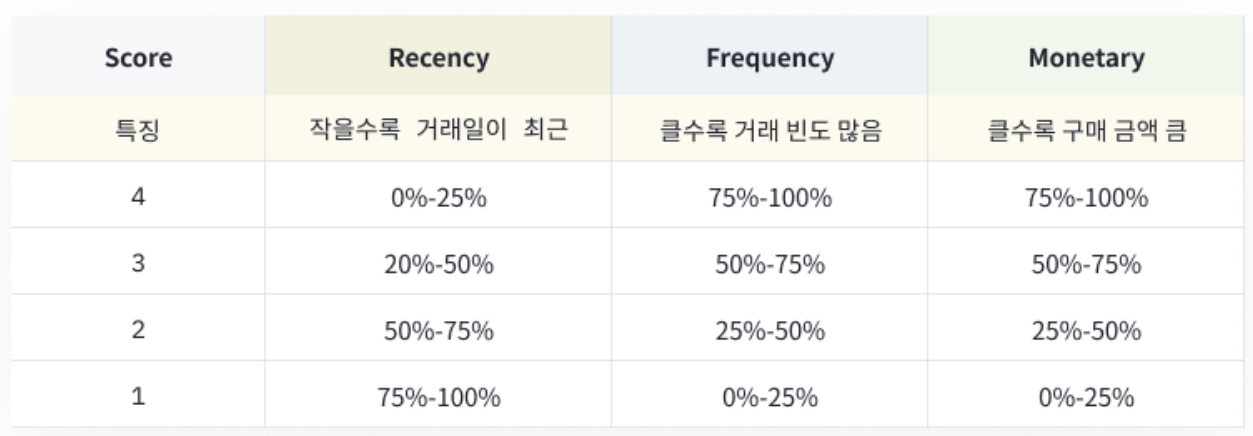
(출처: https://tableauwiki.com/rfm/)

* 'F'의 경우 위의 예시처럼 균등하게 구간을 나누지 않고 아래의 표로 진행함.
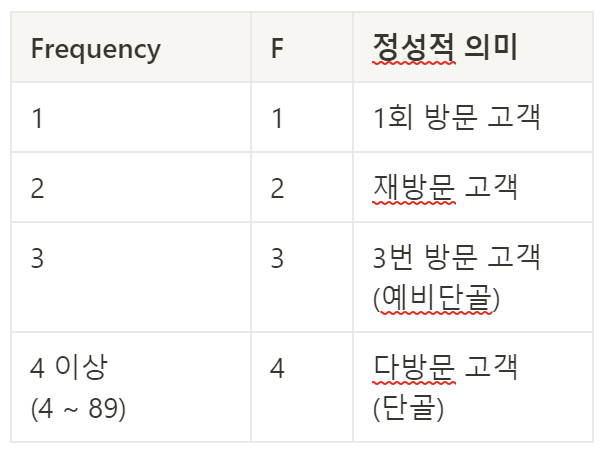

In [122]:
# RFM 데이터프레임만들기
# Recency : 최근 거래 기준일(last_timestamp)과 고객별 최근 구매한 날짜(x.max())와 차이값
# Frequency : 구매 빈도수
# Monetary : 총 구매 금액
rfm = df.groupby("고객ID").agg({"일자": [lambda x : (last_timestamp - x.max()).days, "nunique"], # '재주문'이 아닌 '재방문' 기준
                                    "가격":"sum"})
rfm.columns = ["Recency", "Frequency", "Monetary"]
rfm

,Recency,Frequency,Monetary
고객ID,,,
1.910000e+02,48,1,8000.0
3.001200e+06,118,3,8500.0
3.004800e+06,418,1,3500.0
3.600059e+06,83,3,43600.0
3.800026e+06,173,1,10500.0
...,...,...,...
9.988000e+10,179,1,17000.0
9.991300e+10,500,1,9500.0
9.991500e+10,488,1,11000.0


In [123]:
# RFM에 부여할 숫자 등급 범위 만들기
r_labels = list(range(4, 0, -1))
m_labels = list(range(1, 5))
cut_size = 4

In [124]:
# RFM 구간화 (1~4)
r_cut = pd.qcut(rfm["Recency"], cut_size, r_labels)
m_cut = pd.qcut(rfm["Monetary"], cut_size, m_labels)

In [125]:
# R, F, M 점수 컬럼 한꺼번에 만들기
rfm = rfm.assign(R=r_cut, M=m_cut)
rfm

,Recency,Frequency,Monetary,R,M
고객ID,,,,,
1.910000e+02,48,1,8000.0,4,2
3.001200e+06,118,3,8500.0,3,2
3.004800e+06,418,1,3500.0,1,1
3.600059e+06,83,3,43600.0,4,4
3.800026e+06,173,1,10500.0,3,3
...,...,...,...,...,...
9.988000e+10,179,1,17000.0,3,4
9.991300e+10,500,1,9500.0,1,3
9.991500e+10,488,1,11000.0,1,3


In [126]:
# F 컬럼 만들기
# Frequency가 1인 경우 1, 2인 경우 2, 3인 경우 3, 나머지인 경우 4~5로 분류
# Frequency가 1, 2, 3의 구성비율이 유의미하게 크다고 생각하여 별도로 그룹을 부여함.

rfm['F'] = 0 # 기본값을 0으로 지정
rfm.loc[rfm['Frequency'] == 1, 'F'] = 1
rfm.loc[rfm['Frequency'] == 2, 'F'] = 2
rfm.loc[rfm['Frequency'] == 3, 'F'] = 3
rfm.loc[rfm['Frequency'] > 3, 'F'] = 4

# 'F'컬럼 형변환 : int -> category
rfm['F'] = rfm['F'].astype('category')

rfm

,Recency,Frequency,Monetary,R,M,F
고객ID,,,,,,
1.910000e+02,48,1,8000.0,4,2,1
3.001200e+06,118,3,8500.0,3,2,3
3.004800e+06,418,1,3500.0,1,1,1
3.600059e+06,83,3,43600.0,4,4,3
3.800026e+06,173,1,10500.0,3,3,1
...,...,...,...,...,...,...
9.988000e+10,179,1,17000.0,3,4,1
9.991300e+10,500,1,9500.0,1,3,1
9.991500e+10,488,1,11000.0,1,3,1


### 고객 분류
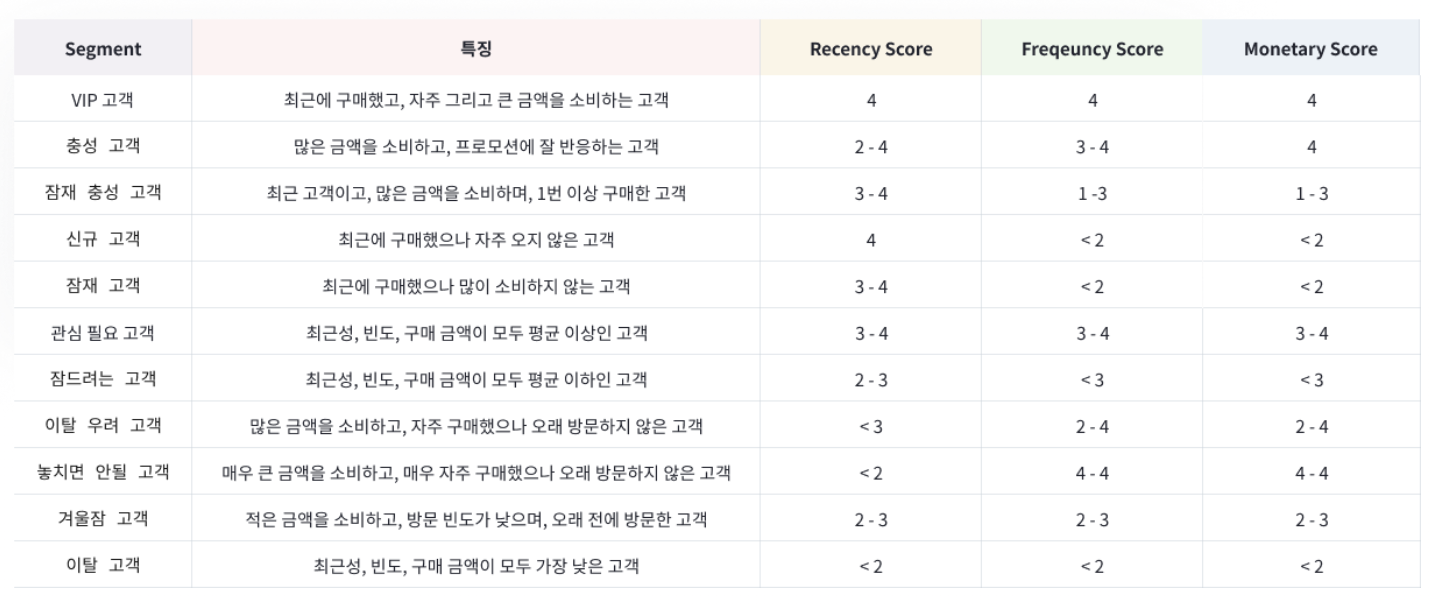
(출처: https://tableauwiki.com/rfm/)

In [127]:
# segmentation 컬럼 생성
rfm['segmentation'] = ''

# 조건에 따라 segmentation 값 입력
for index, row in rfm.iterrows():
    if row['F'] >= 4 and row['M'] >= 4 and row['R'] >= 4:
        rfm.at[index, 'segmentation'] = 'VIP 고객'
    elif row['R'] >= 2 and row['R'] <= 4 and row['F'] >= 3 and row['F'] <= 4 and row['M'] >= 4:
        rfm.at[index, 'segmentation'] = '충성 고객'
    elif row['R'] >= 3 and row['F'] >= 1 and row['F'] <= 3 and row['M'] >= 1 and row['M'] <= 3:
        rfm.at[index, 'segmentation'] = '잠재 충성 고객'
    elif row['R'] >= 4 and row['F'] < 2 and row['M'] < 2:
        rfm.at[index, 'segmentation'] = '신규 고객'
    elif row['R'] >= 3 and row['R'] <= 4 and row['F'] < 2 and row['M'] < 2:
        rfm.at[index, 'segmentation'] = '잠재 고객'
    elif row['R'] >= 3 and row['R'] <= 4 and row['F'] >= 3 and row['F'] <= 4 and row['M'] >= 3 and row['M'] <= 4:
        rfm.at[index, 'segmentation'] = '관심 필요 고객'
    elif row['R'] >= 2 and row['R'] <= 3 and row['F'] < 3 and row['M'] < 3:
        rfm.at[index, 'segmentation'] = '잠드려는 고객'
    elif row['R'] < 3 and row['F'] >= 2 and row['F'] <= 4 and row['M'] >= 2 and row['M'] <= 4:
        rfm.at[index, 'segmentation'] = '이탈 우려 고객'
    elif row['R'] < 2 and row['F'] >= 4 and row['M'] >= 4:
        rfm.at[index, 'segmentation'] = '놓치면 안되는 고객'
    elif row['R'] >= 2 and row['R'] <= 3 and row['F'] >= 2 and row['F'] <= 3 and row['M'] >= 2 and row['M'] <= 3:
        rfm.at[index, 'segmentation'] = '겨울잠 고객'
    elif row['R'] == 1 and row['F'] == 1 and row['M'] == 1:
        rfm.at[index, 'segmentation'] = '이탈 고객'
    else:
        rfm.at[index, 'segmentation'] = '기타'


In [128]:
rfm

,Recency,Frequency,Monetary,R,M,F,segmentation
고객ID,,,,,,,
1.910000e+02,48,1,8000.0,4,2,1,잠재 충성 고객
3.001200e+06,118,3,8500.0,3,2,3,잠재 충성 고객
3.004800e+06,418,1,3500.0,1,1,1,이탈 고객
3.600059e+06,83,3,43600.0,4,4,3,충성 고객
3.800026e+06,173,1,10500.0,3,3,1,잠재 충성 고객
...,...,...,...,...,...,...,...
9.988000e+10,179,1,17000.0,3,4,1,기타
9.991300e+10,500,1,9500.0,1,3,1,기타
9.991500e+10,488,1,11000.0,1,3,1,기타


In [129]:
rfm['segmentation'].value_counts()

segmentation
잠재 충성 고객    2454
기타          2341
잠드려는 고객      898
이탈 고객        471
이탈 우려 고객     237
충성 고객        205
VIP 고객        77
Name: count, dtype: int64

In [131]:
# df와 rfm 병합
# df_final
rfm = rfm.reset_index()
df_final = pd.merge(df, rfm, how='left', on=('고객ID'))
df_final = df_final.drop(columns=['휴일', '강수량'])
df_final.head()

,일자,요일,시간,영수증번호,상품코드,품목,상품명,수량,가격,결제액,...,카드사,고객ID,방문시간대,Recency,Frequency,Monetary,R,M,F,segmentation
0,2022-01-01,토,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-02,일,11:45:31,1.0,10.0,커피,ice 카페라떼,1.0,4000.0,4000.0,...,롯데,8.579258e+10,11,515.0,1.0,4000.0,1,1,1,이탈 고객
2,2022-01-02,일,11:45:49,2.0,25.0,커피,코클슈페너,1.0,4500.0,4500.0,...,비씨,8.600368e+10,11,515.0,1.0,4500.0,1,1,1,이탈 고객
3,2022-01-02,일,13:54:42,3.0,2.0,에스프레소,스트라파짜토,2.0,4000.0,4000.0,...,국민,3.151013e+10,13,515.0,1.0,4000.0,1,1,1,이탈 고객
4,2022-01-02,일,13:55:49,4.0,28.0,커피,ice 바닐라라떼,1.0,4500.0,12000.0,...,현대,2.016200e+09,13,361.0,22.0,257500.0,2,4,4,충성 고객


In [132]:
# df_final.to_csv('df_rfm_final3.csv')

# 추가 분석

In [140]:
# 메뉴명 전처리
df_final['상품명'].unique()

array([nan, 'ice 카페라떼', '코클슈페너', '스트라파짜토', 'ice 바닐라라떼', '브라운치즈 크로플',
       '아인슈페너', 'hot 얼그레이', '콘파냐', '오네로소', '피에노', '샤케라토', 'ice 아메리카노',
       'ice 콜드브루', '자몽에이드', 'hot 카페라떼', 'hot 아메리카노', 'hot 바닐라라떼', '시럽추가',
       '할인 아메리카노', 'hot 자몽티', 'hot 콜드브루라떼', '레몬에이드', 'hot 콜드브루',
       'ice 레몬티', 'hot 레몬티', '에스프레소', 'hot 페퍼민트', 'hot 케모마일', 'ice 자몽티',
       'ice 얼그레이', 'ice 콜드브루라떼', 'ice 케모마일', 'ice 페퍼민트', '스콘', '청포도에이드',
       '휘낭시에 초코', '대파치즈스콘', '휘낭시에 로투스', '샷추가', '휘낭시에 황치즈', '초코크림라떼',
       '아이스티 복숭아', '패션후르츠에이드', 'ice 돌체라떼', 'hot 돌체라떼', '아이스티 레몬', '유자차',
       'ice 콜드브루 돌체라떼', 'hot 콜드브루 돌체라떼', 'ice 그린티라떼', '#NAME?'],
      dtype=object)

In [141]:
#후녕님감사합니다
#할인아메리카노 -> 아메리카노로 변경
#메뉴분석에 필요없는 행 제거 ['시럽추가', '- 연하게', '샷추가']
#ice, hot을 제외한 데이터셋을 만들자 (한글 문자만 남기고 앞 뒤 빈칸 제거)

df_final.loc[df_final['상품명'] == '할인 아메리카노', '상품명'] = '아메리카노'
df_final = df_final[~df_final['상품명'].isin(['시럽추가', '- 연하게', '샷추가'])]
df_final['N_상품명'] = df_final['상품명'].str.replace('[^ㄱ-ㅎ가-힣]', '', regex=True).str.strip()

df_final.head(3)

,일자,요일,시간,영수증번호,상품코드,품목,상품명,수량,가격,결제액,...,고객ID,방문시간대,Recency,Frequency,Monetary,R,M,F,segmentation,N_상품명
0,2022-01-01,토,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-02,일,11:45:31,1.0,10.0,커피,ice 카페라떼,1.0,4000.0,4000.0,...,8.579258e+10,11,515.0,1.0,4000.0,1,1,1,이탈 고객,카페라떼
2,2022-01-02,일,11:45:49,2.0,25.0,커피,코클슈페너,1.0,4500.0,4500.0,...,8.600368e+10,11,515.0,1.0,4500.0,1,1,1,이탈 고객,코클슈페너


In [145]:
df_final = df_final.dropna()

In [146]:
메뉴 = {
    '디저트': ['크로플', '스콘', '휘낭시에', '대파치즈스콘'],
    '에스프레소': ['스트라파짜토', '오네로소', '콘파냐', '피에노', '샤케라토', '에스프레소'],
    '논커피': ['얼그레이', '케모마일', '페퍼민트', '레몬티', '자몽티', '유자차', '에이드', '초코크림라떼', '아이스티', '그린티라떼'],
    '커피': ['카페라떼', '코클슈페너', '바닐라라떼', '아인슈페너', '아메리카노', '콜드브루', '돌체라떼']
}

# 상품명의 오른쪽 글자가 메뉴 딕셔너리의 키에 포함되어 있다면 해당 키를 할당
for index, row in df_final.iterrows():
    for key, value in 메뉴.items():
        for item in value:
            if item in row['N_상품명']:
                df_final.at[index, '품목'] = key
                break

df_final.head()

,일자,요일,시간,영수증번호,상품코드,품목,상품명,수량,가격,결제액,...,고객ID,방문시간대,Recency,Frequency,Monetary,R,M,F,segmentation,N_상품명
1,2022-01-02,일,11:45:31,1.0,10.0,커피,ice 카페라떼,1.0,4000.0,4000.0,...,8.579258e+10,11,515.0,1.0,4000.0,1,1,1,이탈 고객,카페라떼
2,2022-01-02,일,11:45:49,2.0,25.0,커피,코클슈페너,1.0,4500.0,4500.0,...,8.600368e+10,11,515.0,1.0,4500.0,1,1,1,이탈 고객,코클슈페너
3,2022-01-02,일,13:54:42,3.0,2.0,에스프레소,스트라파짜토,2.0,4000.0,4000.0,...,3.151013e+10,13,515.0,1.0,4000.0,1,1,1,이탈 고객,스트라파짜토
4,2022-01-02,일,13:55:49,4.0,28.0,커피,ice 바닐라라떼,1.0,4500.0,12000.0,...,2.016200e+09,13,361.0,22.0,257500.0,2,4,4,충성 고객,바닐라라떼
5,2022-01-02,일,13:55:49,4.0,22.0,디저트,브라운치즈 크로플,1.0,7500.0,12000.0,...,2.016200e+09,13,361.0,22.0,257500.0,2,4,4,충성 고객,브라운치즈크로플


## VIP고객과 콜드브루의 관계

In [147]:
# 대다수의 vip고객이 콜드브루를 좋아하는가? 혹은 특별하게 많이 구매한 고객이 있는가?
# 고객번호 ‘98989130773’의 특수한 취향일 뿐이므로 모든 VIP 고객이 콜드브루를 선호하는 것이라 하긴 어렵다.
df_final.loc[(df_final['segmentation'] == 'VIP 고객') & (df_final['N_상품명'] == '콜드브루')].groupby('고객ID').agg({'수량':'sum'}).sort_values(by='수량', ascending=False)

,수량
고객ID,
9.898913e+10,177.0
6.663867e+10,36.0
4.318342e+10,33.0
2.188713e+10,21.0
7.036508e+10,17.0
4.689464e+10,16.0
3.220309e+09,9.0
9.586901e+09,9.0
5.192016e+10,7.0


In [152]:
df_vip_coldbrew = df_final.loc[(df_final['segmentation'] == 'VIP 고객') & (df_final['N_상품명'] == '콜드브루')].groupby('고객ID').agg({'일자':['min', 'max'], '수량':'sum'})
df_vip_coldbrew

일자                수량
                    min        max    sum
고객ID                                     
1.510730e+09 2022-04-09 2022-04-09    1.0
3.220309e+09 2022-08-05 2022-09-27    9.0
9.586901e+09 2022-09-21 2023-04-27    9.0
1.998917e+10 2023-04-13 2023-04-13    1.0
2.036803e+10 2022-09-24 2022-09-24    1.0
2.188713e+10 2022-05-11 2023-02-23   21.0
2.200322e+10 2023-03-04 2023-05-02    3.0
3.351033e+10 2023-05-02 2023-05-02    1.0
3.351034e+10 2022-09-27 2022-09-27    1.0
4.318342e+10 2023-01-03 2023-04-21   33.0
4.689464e+10 2022-03-11 2023-04-26   16.0
5.192016e+10 2022-04-02 2022-09-18    7.0
5.211254e+10 2022-02-12 2022-02-12    1.0
5.817186e+10 2022-08-09 2022-08-17    2.0
6.663867e+10 2022-02-09 2023-03-24   36.0
7.036508e+10 2022-11-04 2023-05-04   17.0
7.200227e+10 2022-10-05 2023-05-03    7.0
7.603467e+10 2023-02-02 2023-05-02    5.0
7.991497e+10 2022-02-18 2023-05-05    3.0
9.898913e+10 2022-01-04 2023-03-09  177.0

In [158]:
df_vcb = df_vip_coldbrew.reset_index()
df_vcb

고객ID         일자                수량
                        min        max    sum
0   1.510730e+09 2022-04-09 2022-04-09    1.0
1   3.220309e+09 2022-08-05 2022-09-27    9.0
2   9.586901e+09 2022-09-21 2023-04-27    9.0
3   1.998917e+10 2023-04-13 2023-04-13    1.0
4   2.036803e+10 2022-09-24 2022-09-24    1.0
5   2.188713e+10 2022-05-11 2023-02-23   21.0
6   2.200322e+10 2023-03-04 2023-05-02    3.0
7   3.351033e+10 2023-05-02 2023-05-02    1.0
8   3.351034e+10 2022-09-27 2022-09-27    1.0
9   4.318342e+10 2023-01-03 2023-04-21   33.0
10  4.689464e+10 2022-03-11 2023-04-26   16.0
11  5.192016e+10 2022-04-02 2022-09-18    7.0
12  5.211254e+10 2022-02-12 2022-02-12    1.0
13  5.817186e+10 2022-08-09 2022-08-17    2.0
14  6.663867e+10 2022-02-09 2023-03-24   36.0
15  7.036508e+10 2022-11-04 2023-05-04   17.0
16  7.200227e+10 2022-10-05 2023-05-03    7.0
17  7.603467e+10 2023-02-02 2023-05-02    5.0
18  7.991497e+10 2022-02-18 2023-05-05    3.0
19  9.898913e+10 2022-01-04 2023-03-09  177.0

In [161]:
# VIP고객 중 콜드브루 첫 주문과 마지막 주문 사이 기간 구하기

df_vcb['기간'] = 0
for i in range(len(df_vcb)):
    df_vcb.iloc[i, 4] = df_vcb.iloc[i, 2] - df_vcb.iloc[i, 1]

df_vcb

고객ID         일자                수량                 기간
                        min        max    sum                   
0   1.510730e+09 2022-04-09 2022-04-09    1.0    0 days 00:00:00
1   3.220309e+09 2022-08-05 2022-09-27    9.0   53 days 00:00:00
2   9.586901e+09 2022-09-21 2023-04-27    9.0  218 days 00:00:00
3   1.998917e+10 2023-04-13 2023-04-13    1.0    0 days 00:00:00
4   2.036803e+10 2022-09-24 2022-09-24    1.0    0 days 00:00:00
5   2.188713e+10 2022-05-11 2023-02-23   21.0  288 days 00:00:00
6   2.200322e+10 2023-03-04 2023-05-02    3.0   59 days 00:00:00
7   3.351033e+10 2023-05-02 2023-05-02    1.0    0 days 00:00:00
8   3.351034e+10 2022-09-27 2022-09-27    1.0    0 days 00:00:00
9   4.318342e+10 2023-01-03 2023-04-21   33.0  108 days 00:00:00
10  4.689464e+10 2022-03-11 2023-04-26   16.0  411 days 00:00:00
11  5.192016e+10 2022-04-02 2022-09-18    7.0  169 days 00:00:00
12  5.211254e+10 2022-02-12 2022-02-12    1.0    0 days 00:00:00
13  5.817186e+10 2022-08-09 2022-08-17    2.0    8 days 00:00:00
14  6.663867e+10 2022-02-09 2023-03-24   36.0  408 days 00:00:00
15  7.036508e+10 2022-11-04 2023-05-04   17.0  181 days 00:00:00
16  7.200227e+10 2022-10-05 2023-05-03    7.0  210 days 00:00:00
17  7.603467e+10 2023-02-02 2023-05-02    5.0   89 days 00:00:00
18  7.991497e+10 2022-02-18 2023-05-05    3.0  441 days 00:00:00
19  9.898913e+10 2022-01-04 2023-03-09  177.0  429 days 00:00:00

In [179]:
# 이상치 제거
df_vcb = df_vcb.iloc[:-1]

In [180]:
from datetime import timedelta

# Timedelta 데이터의 평균 계산
average_delta = sum(df_vcb['기간'], timedelta()) / len(df_vcb['기간'])

# 결과 출력
print(average_delta)

139 days 02:31:34.736842106


## 이탈고객, 이탈우려고객과 에스프레소류

In [191]:
df_final.columns

Index(['일자', '요일', '시간', '영수증번호', '상품코드', '품목', '상품명', '수량', '가격', '결제액',
       '거래수단', '카드번호', '카드사', '고객ID', '방문시간대', 'Recency', 'Frequency',
       'Monetary', 'R', 'M', 'F', 'segmentation', 'N_상품명'],
      dtype='object')

In [194]:
# 이탈고객의 경우 모두 에스프레소류를 딱 한번 마시고 다시 방문하지 않았음
df_final.loc[(df_final['segmentation']=='이탈 고객') & (df_final['품목'] == '에스프레소')].groupby('고객ID').agg({'일자':'nunique'})

,일자
고객ID,
4.200034e+07,1
2.612206e+09,1
3.042303e+09,1
3.042307e+09,1
3.309304e+09,1
...,...
9.233329e+10,1
9.297291e+10,1
9.415550e+10,1


In [195]:
df_final.loc[(df_final['segmentation']=='이탈 고객') & (df_final['품목'] == '에스프레소')].groupby('고객ID').agg({'일자':'nunique'}).value_counts()

일자
1     82
Name: count, dtype: int64

## 이탈고객과 자몽에이드

In [202]:
df_final.loc[(df_final['segmentation']=='이탈 고객') | (df_final['segmentation']=='충성 고객') & (df_final['N_상품명'] == '자몽에이드')].groupby('고객ID').agg({'일자':'nunique'}).value_counts()

일자
1     372
2       2
5       1
12      1
Name: count, dtype: int64